In [11]:
import os
import cv2
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

def get_cadis_colormap():
    """
    Returns cadis colormap as in paper
    :return: ndarray of rgb colors
    """
    return np.asarray(
        [
            [0, 137, 255],
            [255, 165, 0],
            [255, 156, 201],
            [99, 0, 255],
            [255, 0, 0],
            [255, 0, 165],
            [255, 255, 255],
            [141, 141, 141],
            [255, 218, 0],
            [173, 156, 255],
            [73, 73, 73],
            [250, 213, 255],
            [255, 156, 156],
            [99, 255, 0],
            [157, 225, 255],
            [255, 89, 124],
            [173, 255, 156],
            [255, 60, 0],
            [40, 0, 255],
            [170, 124, 0],
            [188, 255, 0],
            [0, 207, 255],
            [0, 255, 207],
            [188, 0, 255],
            [243, 0, 255],
            [0, 203, 108],
            [252, 255, 0],
            [93, 182, 177],
            [0, 81, 203],
            [211, 183, 120],
            [231, 203, 0],
            [0, 124, 255],
            [10, 91, 44],
            [2, 0, 60],
            [0, 144, 2],
            [133, 59, 59],
        ]
    )

def mask_to_colormap(mask, colormap):
    """
    Genarates RGB mask colormap from mask with class ids
    :param mask: 2D/3D ndarray of input segmentation mask
    :param colormap: dictionary that indicates color corresponding to each class
    :return: 3D ndarray Generated RGB mask
    """
    rgb = np.zeros(mask.shape[:2] + (3,), dtype=np.uint8)
    for label, color in colormap.items():
        rgb[mask == label] = color
    return rgb

def plot_images(img, remapped_mask, remapped_colormap, classes_exp):
    """
    Generates plot of Image and RGB mask with class colorbar
    :param img: 3D ndarray of input image
    :param remapped_mask: 2D/3D ndarray of input segmentation mask with class ids
    :param remapped_colormap: dictionary that indicates color corresponding to each class
    :param classes_exp: dictionary of classes names and corresponding class ids
    :param experiment: experimental setup
    :return: plot of image and rgb mask with class colorbar
    """
    mask_rgb = mask_to_colormap(remapped_mask, colormap=remapped_colormap)

    fig, axs = plt.subplots(1, 2, figsize=(26, 7))
    plt.subplots_adjust(left=1 / 16.0, right=1 - 1 / 16.0, bottom=1 / 8.0, top=1 - 1 / 8.0)
    axs[0].imshow(img)
    axs[0].axis("off")

    img_u_labels = np.unique(remapped_mask)
    c_map = []
    cl = []
    for i_label in img_u_labels:
        for i_key, i_color in remapped_colormap.items():
            if i_label == i_key:
                c_map.append(i_color)
        for i_key, i_class in classes_exp.items():
            if i_label == i_key:
                cl.append(i_class)
    cl = np.asarray(cl)
    cmp = np.asarray(c_map) / 255
    cmap_mask = LinearSegmentedColormap.from_list("seg_mask_colormap", cmp, N=len(cmp))
    im = axs[1].imshow(mask_rgb, cmap=cmap_mask)
    intervals = np.linspace(0, 255, num=len(cl) + 1)
    ticks = intervals + int((intervals[1] - intervals[0]) / 2)
    divider = make_axes_locatable(axs[1])
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar1 = fig.colorbar(mappable=im, cax=cax1, ticks=ticks, orientation="vertical")
    cbar1.ax.set_yticklabels(cl)
    axs[1].axis("off")
    fig.tight_layout()

    return fig

def remap_mask(mask, class_remapping, ignore_label=255):
    """
    Remaps mask class ids
    :param mask: 2D/3D ndarray of input segmentation mask
    :param class_remapping: dictionary that indicates class remapping
    :param ignore_label: class ids to be ignored
    :return: 2D/3D ndarray of remapped segmentation mask
    """
    classes = []
    for key, val in class_remapping.items():
        for cls in val:
            classes.append(cls)
    assert len(classes) == len(set(classes))

    N = max(len(classes), mask.max() + 1)
    remap_array = np.full(N, ignore_label, dtype=np.uint8)
    for key, val in class_remapping.items():
        for v in val:
            remap_array[v] = key
    return remap_array[mask]

def get_remapped_colormap(class_remapping):
    """
    Generated colormap of remapped classes
    Classes that are not remapped are indicated by the same color across all experiments
    :param class_remapping: dictionary that indicates class remapping
    :return: 2D ndarray of rgb colors for remapped colormap
    """
    colormap = get_cadis_colormap()
    remapped_colormap = {}
    for key, val in class_remapping.items():
        if key == 255:
            remapped_colormap.update({key: [0, 0, 0]})
        else:
            remapped_colormap.update({key: colormap[val[0]]})
    return remapped_colormap

def remap_experiment3(mask):
    """Remap mask for Experiment III"""
    class_remapping_exp = {
        0: [0],
        1: [1],
        2: [2],
        3: [3],
        4: [4],
        5: [5],
        6: [6],
        7: [7],
        8: [8],
        9: [9],
        10: [10],
        11: [11],
        12: [12],
        13: [13],
        14: [14],
        15: [15],
        16: [16],
        17: [17],
        18: [18],
        19: [19],
        20: [20],
        21: [21],
        22: [22],
        23: [23],
        24: [24],
        255: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    }
    classes_exp = {
        0: "Pupil",
        1: "Surgical Tape",
        2: "Hand",
        3: "Eye Retractors",
        4: "Iris",
        5: "Skin",
        6: "Cornea",
        7: "Hydro. Cannula",
        8: "Visc. Cannula",
        9: "Cap. Cystotome",
        10: "Rycroft Cannula",
        11: "Bonn Forceps",
        12: "Primary Knife",
        13: "Ph. Handpiece",
        14: "Lens Injector",
        15: "I/A Handpiece",
        16: "Secondary Knife",
        17: "Micromanipulator",
        18: "I/A Handpiece Handle",
        19: "Cap. Forceps",
        20: "R. Cannula Handle",
        21: "Ph. Handpiece Handle",
        22: "Cap. Cystotome Handle",
        23: "Sec. Knife Handle",
        24: "Lens Injector Handle",
        255: "Ignore",
    }
    colormap = get_remapped_colormap(class_remapping_exp)
    remapped_mask = remap_mask(mask, class_remapping=class_remapping_exp)
    return remapped_mask, classes_exp, colormap


def plot_experiment3(img, mask):
    """
    Function for plotting of mask for Experiment III
    :param img: 3D ndarray of input image
    :param mask: 2D/3D ndarray of input segmentation mask with class ids
    :return: plot of image and rgb mask with class colorbar
    """
    remapped_mask, classes_exp, colormap = remap_experiment3(mask)
    return plot_images(img, remapped_mask, colormap, classes_exp)


def plot_experiment(img_path, mask_path, experiment=1):
    """
    Generates plot of image and rgb mask with colorbar for specified experiment
    :param img_path: Path to input image
    :param mask_path: Path to input segmentation mask
    :param experiment: int Experimental setup (1,2 or 3)
    :return: plot of image and rgb mask with class colorbar
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path, cv2.COLOR_BGR2GRAY)
    if experiment == 1:
        return plot_experiment1(img, mask)
    if experiment == 2:
        return plot_experiment2(img, mask)
    if experiment == 3:
        return plot_experiment3(img, mask)


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

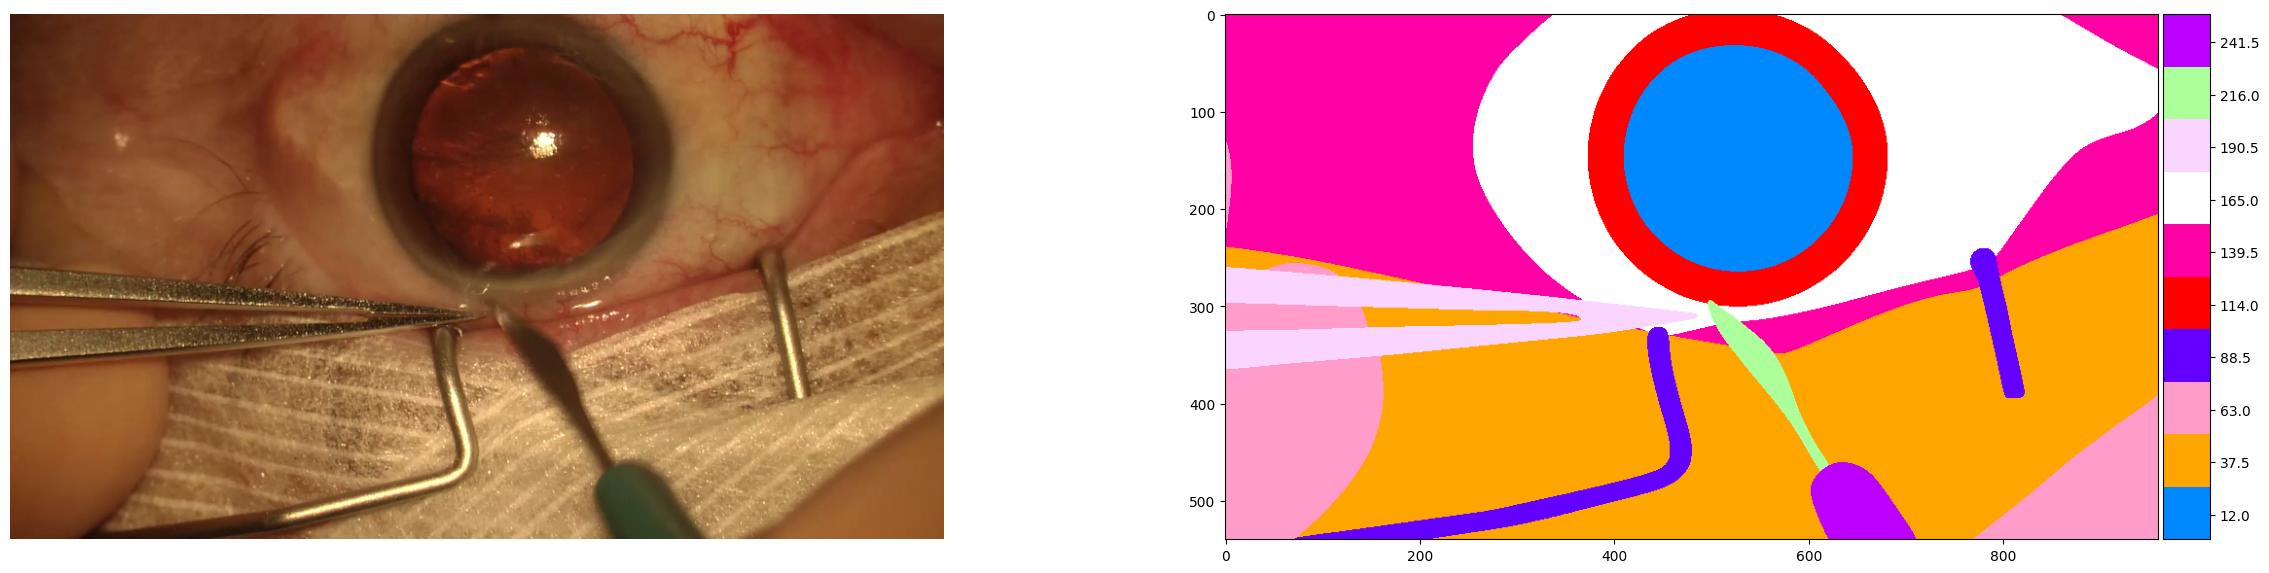

In [12]:
img_path = "/home/data/CaDISv2/Video01/Images/Video1_frame000090.png"
mask_path = "/home/data/CaDISv2/Video01/Labels/Video1_frame000090.png"

assert os.path.exists(img_path), f"{args.image_id} Image/Mask do not exist."

fig = plot_experiment(img_path, mask_path, experiment=3)
fig
# assert os.path.isdir(args.output), f"{args.output} directory does not exist"
# if not os.path.isdir(args.output):
#     os.makedirs(args.output)
# fig.savefig(os.path.join(args.output, "Experiment_" + str(args.experiment) + "_" + filename))